<h4 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h4>

<h1 class='lesson_title'>Exam 1 &mdash; Review Problems &mdash; Solutions</h1>

# Part I Solutions

## Problem 1

In [1]:
import numpy as np

class MatrixPairs:
    """Here we make a class whose objects consist of pairs of matrices."""
    def __init__(self, A, B):
        self.A = A
        self.B = B

    def mult(self):
        """Here we make a method to multiply the matrices."""
        return self.A * self.B

    def add(self):
        """Here we make a method to add matrices."""
        return self.A + self.B 

In [2]:
# Part a
print(MatrixPairs.__doc__)  # prints the doc string for the MatrixPairs class

Here we make a class whose objects consist of pairs of matrices.


In [3]:
# Part b
mypair1 = MatrixPairs(np.array([[1, 2], [2, 3]]), np.array([[1, -2], [-2, 3]]))
mypair1.mult()

array([[ 1, -4],
       [-4,  9]])

In [4]:
# Part c 
mypair2 = MatrixPairs(2,3)
mypair2.mult()

6

In [5]:
# Part d
mypair1.add()

array([[2, 0],
       [0, 6]])

## Problem 2

In [6]:
# Part a
end = 5
filename = 'squares.txt'  # Set the file name
with open(filename, 'w') as file_object:  # Create the file
    for i in range(1, end + 1):  # Loop for the squares we want to see
        a = str(i ** 2)  # Make the squares
        file_object.write(f"{a}  ") # Write the square and add it to the file

In [7]:
# Part b
# This code appends more squares to the file squares.txt
filename = 'squares.txt'
with open(filename, 'a') as file_object: # 'a' corresponds to append
    for i in range(end + 1, 2 * end + 1):
        a = str(i ** 2)
        file_object.write(f"{a}  ")

In [8]:
# Part c
filename = 'squares.txt'
# The 'w' here opens the file and erases it first. 
# So the only thing you see is this print statement.
with open(filename, 'w') as file_object: 
    file_object.write(f"\nThe squares up to {2 * end}.")

## Problem 3

In [9]:
import xlwings as xw

wb = xw.Book()
sht = wb.sheets['Sheet1'] 
sht.range('A1').value = 21
for i in range(2,23):
    j = i-1
    sht.range(f'A{i}').value = sht.range(f'A{j}').value + 1

After running the code, a new spreadsheet will be created and opened.  On Sheet1, the code writes the numbers 21 through 42 in cells A1 through A22, respectively. 

## Problem 4

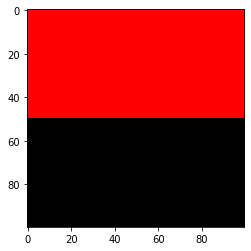

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img

M = np.zeros((100, 100, 3), dtype='uint8')

for i in range(0, 50):
    for j in range(0, 100):
        M[i, j, 0] = 255
        
plt.imshow(M)

A 100x100 image is displayed. The top half is red and the bottom half is black.

## Problem 5

In [11]:
import numpy as np

A = np.zeros([4, 4])
A[0, [1]] = 1
A[1, [3]] = 1
A[2, [0]] = 1
A[3, [2]] = 1

i = 1
I4 = np.eye(4)
while True:
    # Must use np.linalg.matrix_power to raise a matrix to a power, NOT **
    B = np.linalg.matrix_power(A,i)
    
    # B == I4 doesn't work for matrices
    # You need to use np.all to check if all elements are equal
    if np.all(B == I4): 
        # Code won't print i unless you put it in an f string.
        print(f'The minimal power to get the identity is {i}.')
        break
    else:
        i += 1

The minimal power to get the identity is 4.


There are three errors in the code:
 - `B = A**i` should be `np.linalg.matrix_power(B,i)`
 - `B == I4:` should be `np.all(B==I4):`
 - Should have 
 ```python
 print(f'The minimal power to get the identity is {i}.')
 ```

# Part II Solutions

## Problem 6

In [12]:
import xlwings as xw

# Create workbook object pointing to Excel file
wb = xw.Book('numbers.xlsx')

# Create sheet object pointing to Sheet 1
sht = wb.sheets['Sheet1'] 

In [13]:
import numpy as np

# Grab the 5x5 matrix in Sheet 1
# This gives us a list of lists
M = sht.range('A1:E5').value

# Convert this list of lists into a NumPy array
mat = np.array(M)

In [14]:
# **Entry-wise** exponents of the matrix
S = mat ** 2
T = mat ** 3
F = mat ** 4

# Add these new matrices to new sheets in the workbook
wb.sheets.add('second')
sht2 = wb.sheets['second']
sht2.range('A1:E5').value = S

wb.sheets.add('third')
sht3 = wb.sheets['third']
sht3.range('A1:E5').value = T

wb.sheets.add('fourth')
sht4 = wb.sheets['fourth']
sht4.range('A1:E5').value = F

In [15]:
# Grab the (2,1) entry of the new matrices, 
# put them into another sheet
wb.sheets.add('two-ones')
sht5 = wb.sheets['two-ones']
sht5.range('A1').value = sht.range('A2').value
sht5.range('A2').value = sht2.range('A2').value
sht5.range('A3').value = sht3.range('A2').value
sht5.range('A4').value = sht4.range('A2').value

The pattern looks like it is all the powers of 10, starting at $10^1$ on **Sheet1** and multiplying by 10 each time: $10^2$, $10^3$, $10^4$, ....

## Problem 7

Text(0.3090171011989445, -0.7510565087514076, '4')

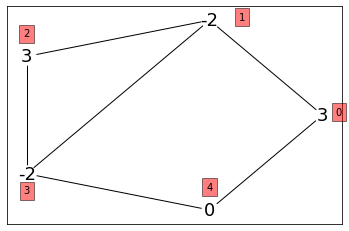

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set up the adjacency matrix for the graph
A = np.zeros([5, 5])
A[0, [1, 4]] = 1
A[1, [0, 2, 3]] = 1
A[2, [1, 3]] = 1
A[3, [1, 2, 4]] = 1
A[4, [0, 3]] = 1

# Create the graph associated with the adjacency matrix
G = nx.Graph(A)

# Create dictionary of vertex balances
balance = {}
balance[0] = 3
balance[1] = -2
balance[2] = 3
balance[3] = -2
balance[4] = 0

# Draw the graph, using NetworkX's circular layout
# Let the node labels be the balances
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, labels=balance, with_labels=True, node_color='w', font_size=18)

# Grab the positions from NetworkX's circular layout
# Draw node name next to each node in a red box
x0, y0 = pos[0]
x1, y1 = pos[1]
x2, y2 = pos[2]
x3, y3 = pos[3]
x4, y4 = pos[4]
plt.text(x0 + 0.1, y0, s='0', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
plt.text(x1 + 0.2, y1, s='1', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
plt.text(x2, y2 + 0.2, s='2', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
plt.text(x3, y3 - 0.2, s='3', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
plt.text(x4, y4 + 0.2, s='4', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')

Now write a function you can use to find a sequence of moves that will result in a non-negative balance on each node.

In [17]:
def dollar():
    """User input function for the dollar game"""
    
    # Get input from user
    move_node = input("Which node would you like to use?  ")
    move_node = int(move_node)
    move_type = input("Would you like to give or take money from this node? Type 'give' or 'take':  ")

    # Change the balance on the nodes affected by the user input
    # If the user wants to give...
    if move_type == 'give':
        # Compute new balance for move_node
        # The degree of move_node is the number of neighbors it has
        balance[move_node] = balance[move_node] - G.degree()[move_node]
        
        # Compute new balance for each neighbor
        for a in G.neighbors(move_node): 
            balance[a] += 1
            
    # If the user wants to take...
    elif move_type == 'take':
        # Compute new balance for move_node
        balance[move_node] = balance[move_node] + G.degree()[move_node]
        
        # Compute new balance for each neighbor
        for a in G.neighbors(move_node):
            balance[a] += -1
    
    # Draw the graph, using NetworkX's circular layout
    # Let the node labels be the balances
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, labels=balance, with_labels=True, node_color='w', font_size=18)

    # Grab the positions from NetworkX's circular layout
    # Draw node name next to each node in a red box
    x0, y0 = pos[0]
    x1, y1 = pos[1]
    x2, y2 = pos[2]
    x3, y3 = pos[3]
    x4, y4 = pos[4]
    plt.text(x0 + 0.1, y0, s='0', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
    plt.text(x1 + 0.2, y1, s='1', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
    plt.text(x2, y2 + 0.2, s='2', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
    plt.text(x3, y3 - 0.2, s='3', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
    plt.text(x4, y4 + 0.2, s='4', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')

A sequence that works is 0 give, 2 give, 4 give, and 0 give.  Is there a shorter sequence? Is there an algorithm to find the shortest sequence?

Which node would you like to use?  0
Would you like to give or take money from this node? Type 'give' or 'take':  give


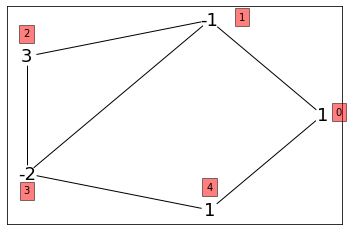

In [18]:
dollar() # Let 0 give to neighbors

Which node would you like to use?  2
Would you like to give or take money from this node? Type 'give' or 'take':  give


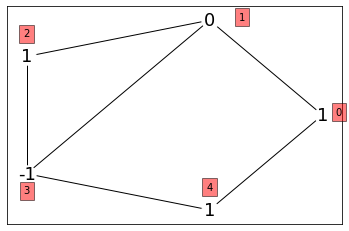

In [19]:
dollar() # Let 2 give to neighbors

Which node would you like to use?  4
Would you like to give or take money from this node? Type 'give' or 'take':  give


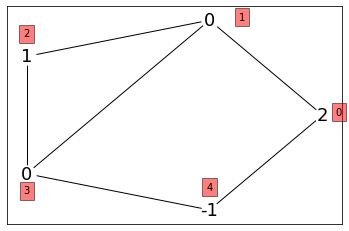

In [20]:
dollar() # Let 4 give to neighbors

Which node would you like to use?  0
Would you like to give or take money from this node? Type 'give' or 'take':  give


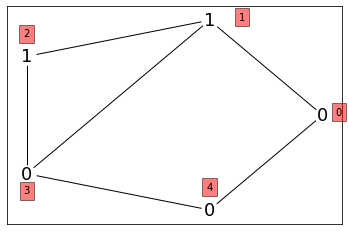

In [21]:
dollar() # Let 0 give to neighbors

Now all nodes have a non-negative balance.

## Problem 8

In [22]:
# Create list of nodes
nodes_list = list(G.nodes)

# Create list of node degrees
degrees = [G.degree[i] for i in nodes_list]

# Create diagonal matrix with degrees along the diagonals
D = np.diag(degrees)

# Compute Laplacian
L = D - A

# Compute all eigenvalues and eigenvectors of Laplacian
eigval, eigvec = np.linalg.eig(L)

# What are the eigenvalues?
print(f"Eigenvalues of Laplacian: {eigval}")

# Compute product of positive eigenvalues
eigval_prod = 1
for e in eigval:
    if e > 1e-10:
        eigval_prod = eigval_prod * e

# Compute number of spanning trees
num_spanning_trees = eigval_prod / G.number_of_nodes()
print(f"The number of spanning trees for this graph is {num_spanning_trees:.6f}.")

Eigenvalues of Laplacian: [8.88178420e-16 4.61803399e+00 1.38196601e+00 2.38196601e+00
 3.61803399e+00]
The number of spanning trees for this graph is 11.000000.


## Problem 9

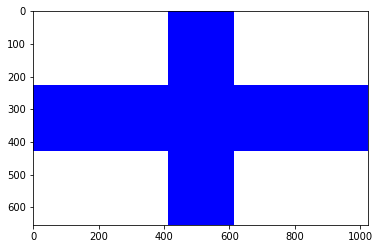

In [23]:
# Part a
import matplotlib.pyplot as plt
import matplotlib.image as img

# Start with white rectangle
M = 255 * np.ones((654, 1024, 3), dtype='uint8')

# Color the center horizontal and vertical strips blue
M[327 - 100:327 + 101, : , 0:2] = 0
M[:, 512 - 100:512 + 101, 0:2] = 0

# Show the image
plt.imshow(M)

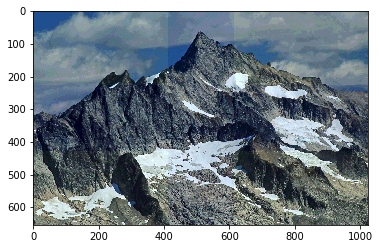

In [24]:
# Part b
# Read the image
cover = img.imread('forbidden.jpg')

# Turn off the lower 4 bits of the cover image
cover_shift = np.left_shift(np.right_shift(cover, 4), 4)

# Shift the secret image 4 bits to the right
secret_shift = np.right_shift(M, 4)

# Create the steganography image
steg = cover_shift + secret_shift

# Show the steganography image
plt.imshow(steg)

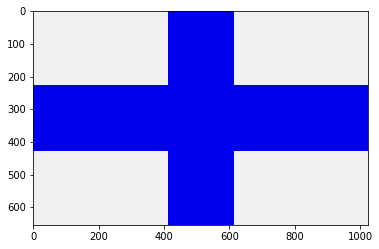

In [25]:
# Part c
# Recover the secret image
recovered = np.left_shift(steg, 4)

# Show the recovered image
plt.imshow(recovered)